In [1]:
import torch

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/admission_predict.csv')

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
# explore the dataset

data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
data = data.rename(index=str, columns={'Chance of Admit ': 'Admit_Probability'})

data = data[['GRE Score', 'TOEFL Score', 
             'University Rating', 'SOP',
             'LOR ', 'CGPA', 'Research',
             'Admit_Probability']]

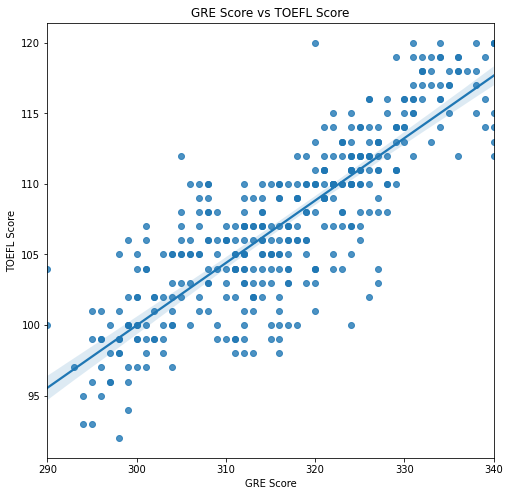

In [8]:
# Visualization of data

plt.figure(figsize=(8, 8))
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data)
plt.title("GRE Score vs TOEFL Score")
plt.show()

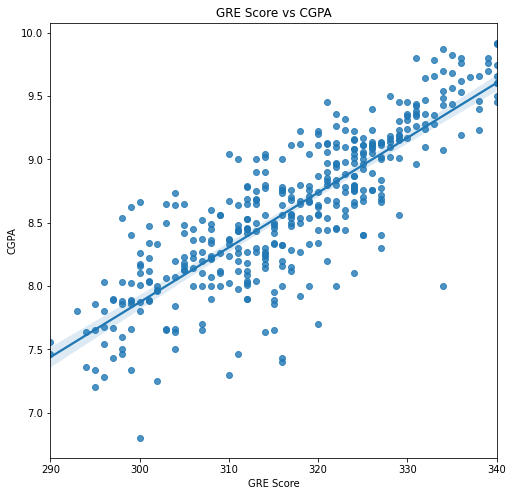

In [9]:
plt.figure(figsize=(8, 8))
fig = sns.regplot(x="GRE Score", y="CGPA", data=data)
plt.title("GRE Score vs CGPA")
plt.show()

Text(0, 0.5, 'CGPA')

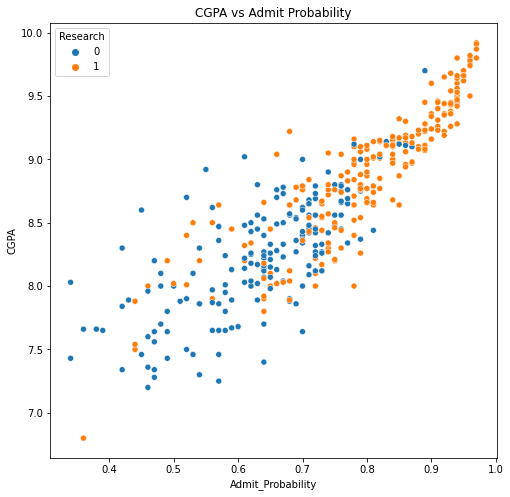

In [10]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(x='Admit_Probability', y='CGPA', data=data, hue='Research')
plt.title("CGPA vs Admit Probability")
plt.xlabel('Admit_Probability')
plt.ylabel('CGPA')

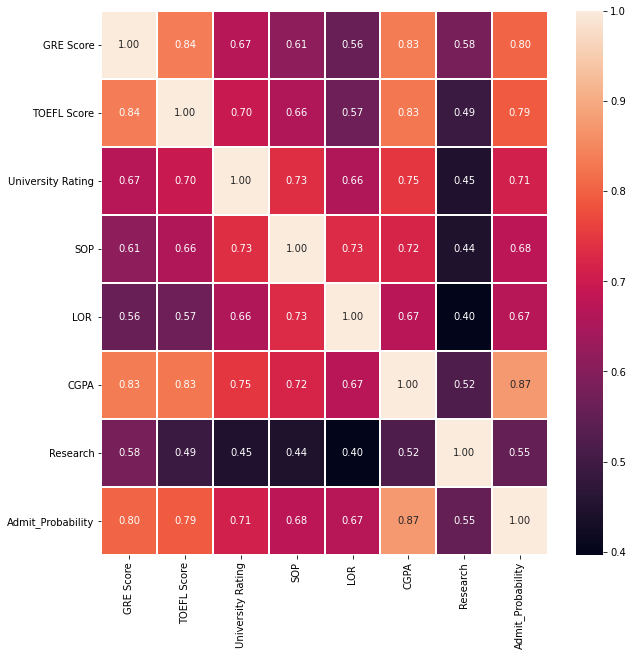

In [11]:
# Heatmap to view the correlation between all pairs of variables in the dataset

plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt='.2f')
plt.show()

## Preprocess of numeric data



In [12]:
from sklearn import preprocessing

In [13]:
data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']] = \
            preprocessing.scale(data[['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']])

In [14]:
data.sample(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Probability
249,0.365860,0.592221,3,0.099442,0.610127,0.387989,1,0.77
234,1.151249,0.922150,5,1.591075,0.610127,1.193938,1,0.91
134,1.413045,0.922150,5,0.596653,0.610127,1.143566,1,0.89
311,0.976718,0.097329,4,1.093864,0.610127,0.975660,1,0.84
106,1.063983,0.592221,4,1.093864,1.167321,0.975660,1,0.87
256,-0.681325,-1.387349,3,0.596653,0.610127,-0.065357,0,0.76
190,0.627656,0.592221,5,1.093864,0.610127,0.942079,1,0.90
56,-0.070467,-0.892456,3,-1.392191,-0.504260,-2.013067,0,0.64
42,-0.332263,-0.067635,2,-0.894980,-1.618648,-0.166101,1,0.53
11,0.889453,0.592221,4,0.596653,1.167321,0.673429,1,0.84


In [15]:
col = ['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

features = data[col]

In [41]:
features.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,1.762107,1.746971,1.093864,1.167321,1.764818
1,0.627656,-0.067635,0.596653,1.167321,0.455151
2,-0.070467,-0.562528,-0.397769,0.052933,-1.005631
3,0.453126,0.427257,0.099442,-1.061454,0.119339
4,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029


In [86]:
target = data[['Admit_Probability']]

In [87]:
target.head()

,Admit_Probability
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [88]:
def func(x):
    if x >= 0.8:
        return 2
    elif x >= 0.6 and x < 0.8:
        return 1
    else:
        return 0

In [89]:
# temp = target['Admit_Probability'].apply(lambda x: func(x)) 
target['Admit_Probability'] = target['Admit_Probability'].apply(lambda x: func(x)) 

/tmp/ipykernel_23459/475384588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Admit_Probability'] = target['Admit_Probability'].apply(lambda x: func(x))


In [90]:
# bucketize the data into 3 categories

# y.replace(to_replace = target[target >= 0.80], value=int(2), inplace=True, regex=True)
# y.replace(to_replace = target[target >= 0.60], value=int(1), inplace=True, regex=True)
# y.replace(to_replace = target[target < 0.80], value=int(0), inplace=True, regex=True)

In [91]:
target.head()

,Admit_Probability
0,2
1,1
2,1
3,2
4,1


In [92]:
target['Admit_Probability'].unique()

array([2, 1, 0])

## Designing and Training the Neural Network

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2)

In [95]:
Xtrain = torch.from_numpy(X_train.values).float()
Xtest = torch.from_numpy(x_test.values).float()

In [96]:
Xtrain.shape

torch.Size([320, 5])

In [97]:
Y_train.shape, y_test.shape

((320, 1), (80, 1))

In [98]:
# view function is reshaping our tensor from 2D to 1D

Ytrain = torch.from_numpy(Y_train.values).view(1, -1)[0].long()
Ytest = torch.from_numpy(y_test.values).view(1, -1)[0].long()

In [99]:
type(Ytrain), type(Ytest)

(torch.Tensor, torch.Tensor)

In [100]:
Ytrain.shape, Ytest.shape

(torch.Size([320]), torch.Size([80]))

### Defining the parameters of the Neural Network

In [101]:
import torch.nn as nn
import torch.nn.functional as F

In [102]:
input_size = Xtrain.shape[1]

output_size = len(target['Admit_Probability'].unique())

In [103]:
class Net(nn.Module):
    
    def __init__(self,hidden_size, activation_fn = 'relu', apply_dropout=False): 
        super(Net, self).__init__()
        
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        self.hidden_size = hidden_size
        self.activation_fn = activation_fn
        
        self.dropout = None
        if apply_dropout:
            self.dropout = nn.Dropout(0.2)

    
    def forward(self, x):
        
        activation_fn = None
        if  self.activation_fn == 'sigmoid':
                activation_fn = F.torch.sigmoid

        elif self.activation_fn == 'tanh':
                activation_fn = F.torch.tanh

        elif self.activation_fn == 'relu':
                 activation_fn = F.relu

        x = activation_fn(self.fc1(x))
        x = activation_fn(self.fc2(x))

        if self.dropout != None:
            x = self.dropout(x)

        x = self.fc3(x)
        return F.log_softmax(x, dim = -1)

In [104]:
import torch.optim as optim

### Training the model

In [105]:
def train_and_evaluate_model(model, learn_rate=0.001):
    epoch_data = []
    epochs = 1001
    
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)
    
    loss_fn = nn.NLLLoss()
    
    test_accuracy = 0.0
    for epoch in range(1, epochs):

        optimizer.zero_grad()

        Ypred = model(Xtrain)

        loss = loss_fn(Ypred , Ytrain)
        loss.backward()

        optimizer.step()

        Ypred_test = model(Xtest)
        loss_test = loss_fn(Ypred_test, Ytest)

        _, pred = Ypred_test.data.max(1)

        test_accuracy = pred.eq(Ytest.data).sum().item() / y_test.values.size
        
        epoch_data.append([epoch, loss.data.item(), loss_test.data.item(), test_accuracy])

        if epoch % 100 == 0:
            print ('epoch - %d (%d%%) train loss - %.2f test loss - %.2f Test accuracy - %.4f'\
                   % (epoch, epoch/150 * 10 , loss.data.item(), loss_test.data.item(), test_accuracy))
            

    return {'model' : model,
            'epoch_data' : epoch_data, 
            'num_epochs' : epochs, 
            'optimizer' : optimizer, 
            'loss_fn' : loss_fn,
            'test_accuracy' : test_accuracy,
            '_, pred' : Ypred_test.data.max(1),
            'actual_test_label' : Ytest,
            }

In [106]:
# Model with 3 neurons and sigmoid activation

net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=False)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

In [107]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.18 test loss - 1.21 Test accuracy - 0.2750
epoch - 200 (13%) train loss - 1.08 test loss - 1.12 Test accuracy - 0.2750
epoch - 300 (20%) train loss - 1.02 test loss - 1.06 Test accuracy - 0.6000
epoch - 400 (26%) train loss - 0.98 test loss - 1.02 Test accuracy - 0.4875
epoch - 500 (33%) train loss - 0.95 test loss - 0.99 Test accuracy - 0.4875
epoch - 600 (40%) train loss - 0.91 test loss - 0.96 Test accuracy - 0.4875
epoch - 700 (46%) train loss - 0.88 test loss - 0.93 Test accuracy - 0.6625
epoch - 800 (53%) train loss - 0.84 test loss - 0.90 Test accuracy - 0.6875
epoch - 900 (60%) train loss - 0.80 test loss - 0.86 Test accuracy - 0.6750
epoch - 1000 (66%) train loss - 0.77 test loss - 0.82 Test accuracy - 0.6875


In [108]:
net = Net(hidden_size=3, activation_fn='sigmoid', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=5, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [109]:
result_3_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 1.01 test loss - 1.05 Test accuracy - 0.5000
epoch - 200 (13%) train loss - 0.99 test loss - 1.03 Test accuracy - 0.5000
epoch - 300 (20%) train loss - 0.96 test loss - 0.97 Test accuracy - 0.5250
epoch - 400 (26%) train loss - 0.91 test loss - 0.95 Test accuracy - 0.5375
epoch - 500 (33%) train loss - 0.89 test loss - 0.88 Test accuracy - 0.6625
epoch - 600 (40%) train loss - 0.82 test loss - 0.87 Test accuracy - 0.5750
epoch - 700 (46%) train loss - 0.82 test loss - 0.86 Test accuracy - 0.6125
epoch - 800 (53%) train loss - 0.78 test loss - 0.80 Test accuracy - 0.6375
epoch - 900 (60%) train loss - 0.77 test loss - 0.77 Test accuracy - 0.6375
epoch - 1000 (66%) train loss - 0.74 test loss - 0.75 Test accuracy - 0.6625


In [110]:
# model with 50 neurons and tanh activation

net = Net(hidden_size=50, activation_fn='tanh')

net

Net(
  (fc1): Linear(in_features=5, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=3, bias=True)
)

In [111]:
result_50_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.47 test loss - 0.36 Test accuracy - 0.8875
epoch - 200 (13%) train loss - 0.45 test loss - 0.34 Test accuracy - 0.8875
epoch - 300 (20%) train loss - 0.43 test loss - 0.33 Test accuracy - 0.8875
epoch - 400 (26%) train loss - 0.41 test loss - 0.32 Test accuracy - 0.9000
epoch - 500 (33%) train loss - 0.37 test loss - 0.33 Test accuracy - 0.9000
epoch - 600 (40%) train loss - 0.34 test loss - 0.35 Test accuracy - 0.8875
epoch - 700 (46%) train loss - 0.30 test loss - 0.39 Test accuracy - 0.8750
epoch - 800 (53%) train loss - 0.25 test loss - 0.45 Test accuracy - 0.8750
epoch - 900 (60%) train loss - 0.20 test loss - 0.52 Test accuracy - 0.8375
epoch - 1000 (66%) train loss - 0.15 test loss - 0.63 Test accuracy - 0.8000


In [112]:
# model with 1000 neurons and tanh activation

net = Net(hidden_size=1000, activation_fn='tanh')

net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
)

In [113]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.34 test loss - 0.34 Test accuracy - 0.8625
epoch - 200 (13%) train loss - 0.13 test loss - 0.50 Test accuracy - 0.7625
epoch - 300 (20%) train loss - 0.03 test loss - 0.69 Test accuracy - 0.7750
epoch - 400 (26%) train loss - 0.01 test loss - 0.80 Test accuracy - 0.7750
epoch - 500 (33%) train loss - 0.01 test loss - 0.87 Test accuracy - 0.7625
epoch - 600 (40%) train loss - 0.00 test loss - 0.91 Test accuracy - 0.7625
epoch - 700 (46%) train loss - 0.00 test loss - 0.95 Test accuracy - 0.7625
epoch - 800 (53%) train loss - 0.00 test loss - 0.99 Test accuracy - 0.7625
epoch - 900 (60%) train loss - 0.00 test loss - 1.02 Test accuracy - 0.7625
epoch - 1000 (66%) train loss - 0.00 test loss - 1.04 Test accuracy - 0.7625


In [115]:
net = Net(hidden_size=1000, activation_fn='tanh', apply_dropout=True)

net

Net(
  (fc1): Linear(in_features=5, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=3, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [116]:
result_1000_tanh = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.36 test loss - 0.34 Test accuracy - 0.8500
epoch - 200 (13%) train loss - 0.17 test loss - 0.49 Test accuracy - 0.8250
epoch - 300 (20%) train loss - 0.07 test loss - 0.62 Test accuracy - 0.8125
epoch - 400 (26%) train loss - 0.03 test loss - 0.78 Test accuracy - 0.8000
epoch - 500 (33%) train loss - 0.02 test loss - 0.84 Test accuracy - 0.7750
epoch - 600 (40%) train loss - 0.02 test loss - 0.92 Test accuracy - 0.8125
epoch - 700 (46%) train loss - 0.01 test loss - 1.06 Test accuracy - 0.7875
epoch - 800 (53%) train loss - 0.01 test loss - 1.24 Test accuracy - 0.7375
epoch - 900 (60%) train loss - 0.00 test loss - 1.12 Test accuracy - 0.7625
epoch - 1000 (66%) train loss - 0.00 test loss - 1.11 Test accuracy - 0.7625


In [117]:
# model with 100 neurons and sigmoid activation

net = Net(hidden_size=100, activation_fn='sigmoid')

net

Net(
  (fc1): Linear(in_features=5, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=3, bias=True)
)

In [118]:
result_100_sigmoid = train_and_evaluate_model(net)

epoch - 100 (6%) train loss - 0.56 test loss - 0.55 Test accuracy - 0.6875
epoch - 200 (13%) train loss - 0.49 test loss - 0.41 Test accuracy - 0.8625
epoch - 300 (20%) train loss - 0.47 test loss - 0.37 Test accuracy - 0.8750
epoch - 400 (26%) train loss - 0.46 test loss - 0.35 Test accuracy - 0.8875
epoch - 500 (33%) train loss - 0.45 test loss - 0.34 Test accuracy - 0.8875
epoch - 600 (40%) train loss - 0.45 test loss - 0.33 Test accuracy - 0.8875
epoch - 700 (46%) train loss - 0.44 test loss - 0.33 Test accuracy - 0.8875
epoch - 800 (53%) train loss - 0.43 test loss - 0.33 Test accuracy - 0.8875
epoch - 900 (60%) train loss - 0.43 test loss - 0.33 Test accuracy - 0.8875
epoch - 1000 (66%) train loss - 0.43 test loss - 0.33 Test accuracy - 0.8875


### The above model gives out the highest accuracy so we finalise it

In [119]:
result_model = result_100_sigmoid

In [120]:
df_epochs_data = pd.DataFrame(result_model['epoch_data'], 
                              columns=["epoch", "train_loss", "test_loss", "accuracy"])

In [121]:
import matplotlib.pyplot as plt

/home/neeraj/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/neeraj/.pyenv/versions/3.8.5/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


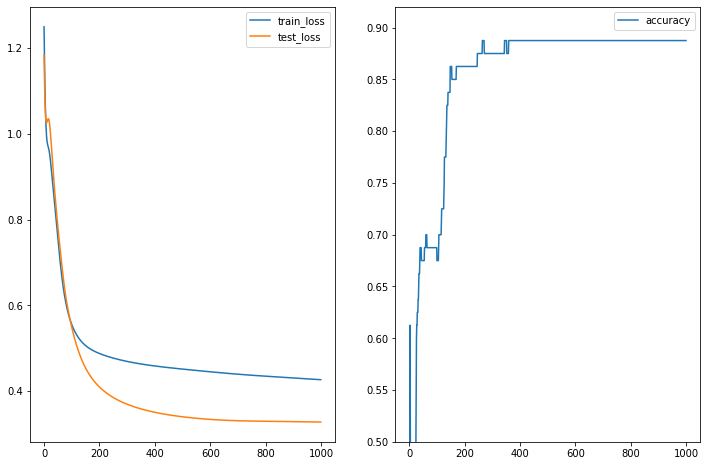

In [122]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

df_epochs_data[["train_loss", "test_loss"]].plot(ax=ax1)
df_epochs_data[["accuracy"]].plot(ax=ax2)

plt.ylim(bottom = 0.5)

plt.show()

### Plot a Confusion Matrix for the Result

In [123]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

In [124]:
_, pred = result_model['_, pred'] 

In [125]:
y_pred = pred.detach().numpy()

In [126]:
Ytest = result_model['actual_test_label'].detach().numpy()

In [127]:
results = confusion_matrix(Ytest, y_pred)

In [128]:
results

array([[15,  4,  0],
       [ 2, 37,  0],
       [ 0,  3, 19]])

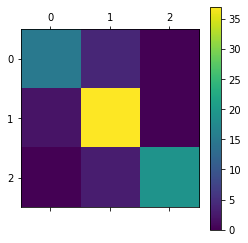

In [129]:
plt.matshow(results)

plt.colorbar()
plt.show()

In [130]:
recall_score(Ytest, y_pred,average = 'weighted')

0.8875

In [131]:
precision_score(Ytest, y_pred,average = 'weighted')

0.8945020053475936